In [76]:
from google.colab import drive
drive.mount('/content/gdrive')
path="/content/gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master/"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Install neccessary libraries and models

In [77]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import os
import pickle
import json
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import joblib
np.random.seed(24)
import xgboost

import warnings
warnings.filterwarnings("ignore")

from sklearn.svm import SVR

In [78]:
cd "gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master"

[Errno 2] No such file or directory: 'gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master'
/content/gdrive/My Drive/Colab Notebooks/Big_Data_AQI_Estimation-master


In [79]:
!pip install -r requirements.txt

# Basic Functions

In [80]:
class calculateAQI(object):
    '''
    calculate AQI with Taiwan standard 
    
    
    '''


    def __init__(self,air_data):
        
        """
        air_data:{'Ox_8':.0,'Ox':.0,'PM10':.0,'PM25':.0,'CO':.0,'SO2':.0,'SO2_24':.0,'NO2':.0}
        """
        self.MAX_AQI=0
        self.air_data=air_data
        self.calculatetAQI()
            
 
    
    def calculatetAQI(self):
        '''
        Constructor
        '''
        self.AQI = []
        myAQI={'Ox_8':.0,'Ox':.0,'PM10':.0,'PM25':.0,'CO':.0,'SO2':.0,'SO2_24':.0,'NO2':.0}
        self.rank_rule=50
        
        for air in self.air_data.keys():
            myAQI[air]=self.air_data[air]
        
       
        AQI_Ox_8=0
        if myAQI['Ox_8']<=0.054:
            AQI_Ox_8 =50/(0.054)*(myAQI['Ox_8'])
        elif myAQI['Ox_8']<=0.070:
            AQI_Ox_8=49/(0.015)*(myAQI['Ox_8']-0.055)+51
        elif myAQI['Ox_8']<=0.085:
            AQI_Ox_8=49/(0.085-0.071)*(myAQI['Ox_8']-0.071)+101
        elif myAQI['Ox_8']<=0.105:
            AQI_Ox_8=49/(0.105-0.086)*(myAQI['Ox_8']-0.086)+151
        elif myAQI['Ox_8']<=0.200:
            AQI_Ox_8=49/(0.200-0.106)*(myAQI['Ox_8']-0.106)+201
        self.AQI.append(AQI_Ox_8)
        
        AQI_Ox=0
        if myAQI['Ox']<=0.125:
            AQI_Ox =0
        elif myAQI['Ox']<=0.164:
            AQI_Ox=49/(0.164-0.125)*(myAQI['Ox']-0.125)+101
        elif myAQI['Ox']<=0.204:
            AQI_Ox=49/(0.204-0.165)*(myAQI['Ox']-0.165)+151
        elif myAQI['Ox']<=0.404:
            AQI_Ox=49/(0.404-0.205)*(myAQI['Ox']-0.205)+201
        elif myAQI['Ox']<=0.504:
            AQI_Ox=49/(0.504-0.405)*(myAQI['Ox']-0.405)+301
        elif myAQI['Ox']<=0.504:
            AQI_Ox=49/(0.604-0.505)*(myAQI['Ox']-0.505)+401
        self.AQI.append(AQI_Ox)
        
        
        AQI_PM10=0
        if myAQI['PM10']<=54:
            AQI_PM10 =50/(54)*(myAQI['PM10'])
        elif myAQI['PM10']<=154:
            AQI_PM10=49/(99)*(myAQI['PM10']-55)+51
        elif myAQI['PM10']<=254:
            AQI_PM10=49/(99)*(myAQI['PM10']-155)+101
        elif myAQI['PM10']<=354:
            AQI_PM10=49/(99)*(myAQI['PM10']-255)+151
        elif myAQI['PM10']<=424:
            AQI_PM10=49/(69)*(myAQI['PM10']-355)+201
        elif myAQI['PM10']<=504:
            AQI_PM10=49/(89)*(myAQI['PM10']-425)+301
        elif myAQI['PM10']<=604:
            AQI_PM10=49/(99)*(myAQI['PM10']-505)+401
        self.AQI.append(AQI_PM10)
        
        
        AQI_PM25=0
       
        if myAQI['PM25']<=15.4:
            AQI_PM25 =50/(15.4)*(myAQI['PM25'])
        elif myAQI['PM25']<=35.4:
            AQI_PM25=49/(35.4-15.5)*(myAQI['PM25']-15.5)+51
        elif myAQI['PM25']<=54.4:
            AQI_PM25=49/(54.4-35.5)*(myAQI['PM25']-40.5)+101
        elif myAQI['PM25']<=150.4:
            AQI_PM25=49/(150.4-54.5)*(myAQI['PM25']-65.5)+151
        elif myAQI['PM25']<=250.4:
            AQI_PM25=49/(250.4-150.5)*(myAQI['PM25']-150.5)+201
        elif myAQI['PM25']<=350.4:
            AQI_PM25=49/(350.4-250.5)*(myAQI['PM25']-250.5)+301
        elif myAQI['PM25']<=500.4:
            AQI_PM25=49/(500.4-350.5)*(myAQI['PM25']-350.5)+401
        self.AQI.append(AQI_PM25)
        
        AQI_CO=0
        if myAQI['CO']<=4.4:
            AQI_CO =50/(4.4)*(myAQI['CO'])
        elif myAQI['CO']<=9.4:
            AQI_CO=49/(4.9)*(myAQI['CO']-4.5)+51
        elif myAQI['CO']<=12.4:
            AQI_CO=49/(2.9)*(myAQI['CO']-9.5)+101
        elif myAQI['CO']<=15.4:
            AQI_CO=49/(2.9)*(myAQI['CO']-12.5)+151
        elif myAQI['CO']<=30.4:
            AQI_CO=49/(14.9)*(myAQI['CO']-15.5)+201
        elif myAQI['CO']<=40.4:
            AQI_CO=49/(9.9)*(myAQI['CO']-30.5)+301
        elif myAQI['CO']<=50.4:
            AQI_CO=49/(9.9)*(myAQI['CO']-40.5)+401
        self.AQI.append(AQI_CO)
        
        
        AQI_SO2=0
        if myAQI['SO2']<=0.035:
            AQI_SO2 =50/(0.035)*(myAQI['SO2'])
        elif myAQI['SO2']<=0.075:
            AQI_SO2=49/(0.075-0.036)*(myAQI['SO2']-0.036)+51
        elif myAQI['SO2']<=0.185:
            AQI_SO2=49/(0.185-0.076)*(myAQI['SO2']-0.076)+101
       
        self.AQI.append(AQI_SO2)   
        
        
        AQI_SO2_24=0
        if myAQI['SO2_24']<0.186:
            AQI_SO2_24=0
        elif myAQI['SO2_24']<=0.304 and myAQI['SO2_24']>=0.186:
            AQI_SO2_24=49/(0.304-0.186)*(myAQI['SO2_24']-0.186)+151
        elif myAQI['SO2_24']<=0.604:
            AQI_SO2_24=49/(0.604-0.305)*(myAQI['SO2_24']-0.305)+201
        elif myAQI['SO2_24']<=0.804:
            AQI_SO2_24=49/(0.804-0.605)*(myAQI['SO2_24']-0.605)+301
        elif myAQI['SO2_24']<=1.004:
            AQI_SO2_24=49/(1.004-0.805)*(myAQI['SO2_24']-0.805)+401
            
        self.AQI.append(AQI_SO2_24)      
            
        AQI_NO2=0
        if myAQI['NO2']<=0.053:
            AQI_NO2 =50/(0.053)*(myAQI['NO2'])     
        elif myAQI['NO2']<=0.100:
            AQI_NO2=49/(0.100-0.054)*(myAQI['NO2']-0.054)+51
        elif myAQI['NO2']<=0.360:
            AQI_NO2=49/(0.360-0.101)*(myAQI['NO2']-0.360)+101
        elif myAQI['NO2']<=0.649:
            AQI_NO2=49/(0.649-0.361)*(myAQI['NO2']-0.361)+151
        elif myAQI['NO2']<=1.249:
            AQI_NO2=49/(1.249-0.650)*(myAQI['NO2']-0.650)+201
        elif myAQI['NO2']<=1.649:
            AQI_NO2=49/(1.649-1.250)*(myAQI['NO2']-1.250)+301
        elif myAQI['NO2']<=2.049:
            AQI_NO2=49/(2.049-1.650)*(myAQI['NO2']-1.650)+401
            
        self.AQI.append(AQI_NO2)
        self.MAX_AQI=max(self.AQI)
    
    def getAQI(self):    
        '''
        Return: float, the value of Taiwan AQI
        
        '''     
        return  self.MAX_AQI
    
    
    
    
    def getAQIRank(self):
        '''
        Return: int, the rank of Taiwan AQI
        
        '''
        
        Rank = 0
        if self.MAX_AQI/self.rank_rule<4.0:
            Rank = int(self.MAX_AQI/50)
        elif self.MAX_AQI/self.rank_rule<=6.0:
            Rank = int(4)
        else :
            Rank = int(5)
        
        return Rank

In [81]:
def calc_AQI_from_df(input_df):
    # Calculate AQI and AQI rank for input dataframe
    AQI_list = []
    AQI_rank = []
    pollutants = ['0x_8', '0x', 'PM10', 'PM25', 'CO', 'SO2', 'SO2_24', 'NO2']
    
    for row in input_df.to_numpy():
        myAQI = { key:value for key, value in zip(pollutants, row)}
        AQI_val = calculateAQI(myAQI).getAQI()
        AQI_rank_val = calculateAQI(myAQI).getAQIRank()
        AQI_list.append(AQI_val)
        AQI_rank.append(AQI_rank_val)
    
    AQI_list_np = np.array(AQI_list)
    AQI_rank_np = np.array(AQI_rank)
    
    # Return lists of AQIs and AQI_ranks
    return AQI_list_np, AQI_rank_np

def create_empty_pollutants_columns(preds, pollutants):
    preds_df = pd.DataFrame(data=preds, columns=pollutants)
    # Add empty values for other pollutants
    # empty_pollutant = ['o3_8', 'o3', 'pm10', 'co', 'so2', 'so2_24', 'no2']
    empty_pollutant = ['o3_8', 'so2_24']
    for col in empty_pollutant:
        preds_df[col] = 0
    preds_df= preds_df.reindex(columns=['o3_8', 'o3', 'pm10', 'pm25', 'co', 'so2', 'so2_24', 'no2'])
    return preds_df

In [82]:
def convert_AQI_value_to_AQI_Rank(aqi_value):
    rank_rule = 50
    Rank = 0
    if (aqi_value / rank_rule) < 4.0:
        Rank = int(aqi_value / 50)
    elif (aqi_value/ rank_rule) <= 6.0:
        Rank = int(4)
    else:
        Rank = int(5)
    return Rank

def resample_data(df, time_window):
    print(f"[*] Resampling data based on {time_window} time window")
    df_remove_dup = df.drop_duplicates('time', keep='first', inplace=False, ignore_index=True)
    resampled_data = pd.DataFrame()
    resampler = df_remove_dup.set_index('time').resample(time_window)
    resampled_groups = resampler.groups
    for key in resampled_groups:
        indices = resampler._get_index(key)
        # If there are values in the group bin
        if len(indices):
            # Pick a random value from the group
            indx_choice = [np.random.choice(indices)]
            # Get the picked value from df
            value_df = df_remove_dup.take(indx_choice)
            resampled_data = pd.concat([resampled_data, value_df])      
    print("Done")
    return resampled_data

In [83]:
def convert_AQI_value_to_AQI_Rank(aqi_value):
    rank_rule = 50
    Rank = 0
    if (aqi_value / rank_rule) < 4.0:
        Rank = int(aqi_value / 50)
    elif (aqi_value/ rank_rule) <= 6.0:
        Rank = int(4)
    else:
        Rank = int(5)
    return Rank

def convert_aqi_array_to_aqi_rank_df(aqi_array):
    aqi_rank = []
    for i in range(len(aqi_array)):
        aqi_rank.append(convert_AQI_value_to_AQI_Rank(aqi_array[i]))

    return pd.DataFrame(data = aqi_rank, columns = ['aqi_rank'])

# F1 - score and Accuracy

**1. Sensor Features**

In [84]:
import joblib
#Sensor_features
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Sensor Features/Random split/test_data_sensor_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Sensor Features/Random split/test_label_sensor.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor Features/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor Features/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor Features/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor Features/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor Features/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor Features/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor Features/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

sensor_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_catboost_df = create_empty_pollutants_columns(sensor_catboost_df, sensor_catboost_df.columns)
#df.head()
sensor_catboost_df['aqi'], sensor_catboost_df['aqi_rank'] = calc_AQI_from_df(sensor_catboost_df)
#sensor_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor Features/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor Features/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor Features/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor Features/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor Features/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor Features/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor Features/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

sensor_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_lightgbm_df = create_empty_pollutants_columns(sensor_lightgbm_df, sensor_lightgbm_df.columns)
#sensor_lightgbm_df.head()
sensor_lightgbm_df['aqi'], sensor_lightgbm_df['aqi_rank'] = calc_AQI_from_df(sensor_lightgbm_df)
#sensor_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor Features/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor Features/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor Features/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor Features/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor Features/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor Features/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor Features/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

sensor_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_randomforest_df = create_empty_pollutants_columns(sensor_randomforest_df, sensor_randomforest_df.columns)
#sensor_randomforest_df.head()
sensor_randomforest_df['aqi'], sensor_randomforest_df['aqi_rank'] = calc_AQI_from_df(sensor_randomforest_df)
#sensor_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor Features/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor Features/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor Features/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor Features/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor Features/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor Features/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor Features/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

sensor_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_svm_df = create_empty_pollutants_columns(sensor_svm_df, sensor_svm_df.columns)
#sensor_svm_df.head()
sensor_svm_df['aqi'], sensor_svm_df['aqi_rank'] = calc_AQI_from_df(sensor_svm_df)
#sensor_svm_df.head()

print("[*] SVM's Classification score for AQI rank with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor Features/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor Features/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor Features/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor Features/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor Features/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor Features/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor Features/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

sensor_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_xgboost_df = create_empty_pollutants_columns(sensor_xgboost_df, sensor_xgboost_df.columns)
#sensor_xgboost_df.head()
sensor_xgboost_df['aqi'], sensor_xgboost_df['aqi_rank'] = calc_AQI_from_df(sensor_xgboost_df)
#sensor_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#From predicted AQI values to AQI ranks
#print(type(label['aqi_rank'].values))

[*] Catboost's Classification score for AQI rank with sensor features
Accuracy Score: 68.98%
F1 score: 69.77%
Confusion Matrix:
[[230 144  20   9   0   0]
 [ 28 838  56  56   9   1]
 [  1  60  20   7   3   0]
 [  0  21   9   8   2   0]
 [  0   4   5  18   7   3]
 [  0  12   4  14  14   9]]


[*] Catboost's Classification score for AQI rank (from AQI value) with sensor features
Accuracy Score: 68.24%
F1 score: 69.82%
Confusion Matrix:
[[236 149  13   3   2   0]
 [ 18 814 108  39   9   0]
 [  0  58  27   2   4   0]
 [  0  17  17   4   2   0]
 [  0   1  14  12  10   0]
 [  0   6  10   9  19   9]]




[*] LightGBM's Classification score for AQI rank with sensor features
Accuracy Score: 67.93%
F1 score: 69.47%
Confusion Matrix:
[[257 124   8  11   3   0]
 [ 46 796  61  72  13   0]
 [  1  54  23  11   2   0]
 [  1  19  10   6   4   0]
 [  0   3   8  17   8   1]
 [  1  11   2  16  18   5]]


[*] LightGBM's Classification score for AQI rank (from AQI value) with sensor features
Accuracy Score:

**2. Sensor + PW**

In [85]:
import joblib
#Sensor+PW_features
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Sensor+PW Features/Random split/test_data_sensor_pw_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Sensor+PW Features/Random split/test_label_sensor_pw.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor+PW Features/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor+PW Features/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor+PW Features/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor+PW Features/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor+PW Features/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor+PW Features/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor+PW Features/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

sensor_pw_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_pw_catboost_df = create_empty_pollutants_columns(sensor_pw_catboost_df, sensor_pw_catboost_df.columns)
#df.head()
sensor_pw_catboost_df['aqi'], sensor_pw_catboost_df['aqi_rank'] = calc_AQI_from_df(sensor_pw_catboost_df)
#sensor_pw_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_pw_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_pw_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_pw_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor+PW Features/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor+PW Features/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor+PW Features/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor+PW Features/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor+PW Features/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor+PW Features/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor+PW Features/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

sensor_pw_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_pw_lightgbm_df = create_empty_pollutants_columns(sensor_pw_lightgbm_df, sensor_pw_lightgbm_df.columns)
#sensor_pw_lightgbm_df.head()
sensor_pw_lightgbm_df['aqi'], sensor_pw_lightgbm_df['aqi_rank'] = calc_AQI_from_df(sensor_pw_lightgbm_df)
#sensor_pw_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_pw_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_pw_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_pw_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor+PW Features/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor+PW Features/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor+PW Features/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor+PW Features/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor+PW Features/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor+PW Features/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor+PW Features/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

sensor_pw_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_pw_randomforest_df = create_empty_pollutants_columns(sensor_pw_randomforest_df, sensor_pw_randomforest_df.columns)
#sensor_pw_randomforest_df.head()
sensor_pw_randomforest_df['aqi'], sensor_pw_randomforest_df['aqi_rank'] = calc_AQI_from_df(sensor_pw_randomforest_df)
#sensor_pw_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_pw_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_pw_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_pw_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor+PW Features/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor+PW Features/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor+PW Features/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor+PW Features/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor+PW Features/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor+PW Features/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor+PW Features/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

sensor_pw_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_pw_svm_df = create_empty_pollutants_columns(sensor_pw_svm_df, sensor_pw_svm_df.columns)
#sensor_pw_svm_df.head()
sensor_pw_svm_df['aqi'], sensor_pw_svm_df['aqi_rank'] = calc_AQI_from_df(sensor_pw_svm_df)
#sensor_pw_svm_df.head()

print("[*] SVM's Classification score for AQI rank with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_pw_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_pw_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_pw_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Sensor+PW Features/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Sensor+PW Features/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Sensor+PW Features/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Sensor+PW Features/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Sensor+PW Features/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Sensor+PW Features/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Sensor+PW Features/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

sensor_pw_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
sensor_pw_xgboost_df = create_empty_pollutants_columns(sensor_pw_xgboost_df, sensor_pw_xgboost_df.columns)
#sensor_pw_xgboost_df.head()
sensor_pw_xgboost_df['aqi'], sensor_pw_xgboost_df['aqi_rank'] = calc_AQI_from_df(sensor_pw_xgboost_df)
#sensor_pw_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], sensor_pw_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], sensor_pw_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], sensor_pw_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

[*] Catboost's Classification score for AQI rank with Sensor+PW features
Accuracy Score: 80.89%
F1 score: 81.28%
Confusion Matrix:
[[340  53   9   1   0   0]
 [ 30 886  37  29   4   2]
 [  1  47  34   8   1   0]
 [  1  17  11   8   2   1]
 [  0   6   1  14   9   7]
 [  0   2   5   6  13  27]]


[*] Catboost's Classification score for AQI rank (from AQI value) with Sensor+PW features
Accuracy Score: 82.20%
F1 score: 83.17%
Confusion Matrix:
[[369  32   1   0   1   0]
 [ 28 853  88  13   5   1]
 [  1  27  59   2   2   0]
 [  0  13  21   3   2   1]
 [  0   4   7   9  14   3]
 [  0   0   7   6  13  27]]




[*] LightGBM's Classification score for AQI rank with Sensor+PW features
Accuracy Score: 81.58%
F1 score: 82.37%
Confusion Matrix:
[[350  43   9   1   0   0]
 [ 29 869  52  30   7   1]
 [  2  34  47   6   2   0]
 [  1  21   4  11   2   1]
 [  0   5   3  11  13   5]
 [  0   1   5   8  14  25]]


[*] LightGBM's Classification score for AQI rank (from AQI value) with Sensor+PW features
Acc

**3. Tag+Sensor**

In [86]:
import joblib
#Tag+Sensor_features
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor/Random split/test_data_tag_sensor_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor/Random split/test_label_tag_sensor.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

tag_sensor_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_catboost_df = create_empty_pollutants_columns(tag_sensor_catboost_df, tag_sensor_catboost_df.columns)
#df.head()
tag_sensor_catboost_df['aqi'], tag_sensor_catboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_catboost_df)
#tag_sensor_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

tag_sensor_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_lightgbm_df = create_empty_pollutants_columns(tag_sensor_lightgbm_df, tag_sensor_lightgbm_df.columns)
#tag_sensor_lightgbm_df.head()
tag_sensor_lightgbm_df['aqi'], tag_sensor_lightgbm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_lightgbm_df)
#tag_sensor_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

tag_sensor_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_randomforest_df = create_empty_pollutants_columns(tag_sensor_randomforest_df, tag_sensor_randomforest_df.columns)
#tag_sensor_randomforest_df.head()
tag_sensor_randomforest_df['aqi'], tag_sensor_randomforest_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_randomforest_df)
#tag_sensor_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

tag_sensor_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_svm_df = create_empty_pollutants_columns(tag_sensor_svm_df, tag_sensor_svm_df.columns)
#tag_sensor_svm_df.head()
tag_sensor_svm_df['aqi'], tag_sensor_svm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_svm_df)
#tag_sensor_svm_df.head()

print("[*] SVM's Classification score for AQI rank with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

tag_sensor_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_xgboost_df = create_empty_pollutants_columns(tag_sensor_xgboost_df, tag_sensor_xgboost_df.columns)
#tag_sensor_xgboost_df.head()
tag_sensor_xgboost_df['aqi'], tag_sensor_xgboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_xgboost_df)
#tag_sensor_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with Tag+Sensor features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

[*] Catboost's Classification score for AQI rank with Tag+Sensor features
Accuracy Score: 70.68%
F1 score: 69.46%
Confusion Matrix:
[[ 35  44   1   6   0   0]
 [  3 211   7   8   1   0]
 [  0  14   8   0   0   0]
 [  1   6   0   1   0   0]
 [  0   4   2   3   6   0]
 [  0   6   1   1   4   9]]


[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor features
Accuracy Score: 64.92%
F1 score: 65.07%
Confusion Matrix:
[[ 35  45   5   1   0   0]
 [  9 189  25   5   2   0]
 [  0  13   9   0   0   0]
 [  1   4   2   1   0   0]
 [  0   3   4   3   5   0]
 [  1   5   2   1   3   9]]




[*] LightGBM's Classification score for AQI rank with Tag+Sensor features
Accuracy Score: 72.51%
F1 score: 71.71%
Confusion Matrix:
[[ 39  38   4   5   0   0]
 [  1 214   5   8   2   0]
 [  0  14   8   0   0   0]
 [  0   6   1   1   0   0]
 [  0   4   1   3   7   0]
 [  0   6   2   3   2   8]]


[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor features

**4. Tag+Sensor+PW**

In [87]:
import joblib
#Tag+Sensor+PW_features
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+PW/Random split/test_data_tag_sensor_pw_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+PW/Random split/test_label_tag_sensor_pw.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+PW/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+PW/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+PW/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+PW/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+PW/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+PW/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+PW/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

tag_sensor_pw_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_pw_catboost_df = create_empty_pollutants_columns(tag_sensor_pw_catboost_df, tag_sensor_pw_catboost_df.columns)
#df.head()
tag_sensor_pw_catboost_df['aqi'], tag_sensor_pw_catboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_pw_catboost_df)
#tag_sensor_pw_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_pw_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_pw_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_pw_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+PW/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+PW/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+PW/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+PW/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+PW/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+PW/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+PW/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

tag_sensor_pw_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_pw_lightgbm_df = create_empty_pollutants_columns(tag_sensor_pw_lightgbm_df, tag_sensor_pw_lightgbm_df.columns)
#tag_sensor_pw_lightgbm_df.head()
tag_sensor_pw_lightgbm_df['aqi'], tag_sensor_pw_lightgbm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_pw_lightgbm_df)
#tag_sensor_pw_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_pw_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_pw_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_pw_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+PW/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+PW/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+PW/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+PW/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+PW/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+PW/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+PW/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

tag_sensor_pw_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_pw_randomforest_df = create_empty_pollutants_columns(tag_sensor_pw_randomforest_df, tag_sensor_pw_randomforest_df.columns)
#tag_sensor_pw_randomforest_df.head()
tag_sensor_pw_randomforest_df['aqi'], tag_sensor_pw_randomforest_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_pw_randomforest_df)
#tag_sensor_pw_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_pw_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_pw_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_pw_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+PW/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+PW/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+PW/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+PW/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+PW/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+PW/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+PW/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

tag_sensor_pw_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_pw_svm_df = create_empty_pollutants_columns(tag_sensor_pw_svm_df, tag_sensor_pw_svm_df.columns)
#tag_sensor_pw_svm_df.head()
tag_sensor_pw_svm_df['aqi'], tag_sensor_pw_svm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_pw_svm_df)
#tag_sensor_pw_svm_df.head()

print("[*] SVM's Classification score for AQI rank with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_pw_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_pw_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_pw_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+PW/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+PW/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+PW/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+PW/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+PW/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+PW/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+PW/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

tag_sensor_pw_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_pw_xgboost_df = create_empty_pollutants_columns(tag_sensor_pw_xgboost_df, tag_sensor_pw_xgboost_df.columns)
#tag_sensor_pw_xgboost_df.head()
tag_sensor_pw_xgboost_df['aqi'], tag_sensor_pw_xgboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_pw_xgboost_df)
#tag_sensor_pw_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_pw_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_pw_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_pw_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with Tag+Sensor+PW features")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

[*] Catboost's Classification score for AQI rank with Tag+Sensor+PW features
Accuracy Score: 74.08%
F1 score: 73.75%
Confusion Matrix:
[[ 49  32   4   1   0   0]
 [  2 210  12   5   1   0]
 [  0  15   7   0   0   0]
 [  1   5   0   2   0   0]
 [  0   4   0   5   6   0]
 [  0   6   0   4   2   9]]


[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+PW features
Accuracy Score: 71.47%
F1 score: 72.01%
Confusion Matrix:
[[ 48  34   2   2   0   0]
 [  4 194  28   2   1   1]
 [  0   7  15   0   0   0]
 [  1   4   2   1   0   0]
 [  0   4   3   2   6   0]
 [  1   4   2   1   4   9]]




[*] LightGBM's Classification score for AQI rank with Tag+Sensor+PW features
Accuracy Score: 76.44%
F1 score: 76.84%
Confusion Matrix:
[[ 49  30   4   3   0   0]
 [  3 209   8   9   0   1]
 [  0   8  14   0   0   0]
 [  1   4   1   2   0   0]
 [  0   3   1   3   8   0]
 [  0   5   1   4   1  10]]


[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor

**5. Tag+Sensor+Image_EfficientDet D7 1536x1536**

In [88]:
import joblib
#Tag+Sensor+Image_EfficientDet D7 1536x1536
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random split/test_data_tag_sensor_image_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random split/test_label_tag_sensor_image.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

tag_sensor_image_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_catboost_df = create_empty_pollutants_columns(tag_sensor_image_catboost_df, tag_sensor_image_catboost_df.columns)
#df.head()
tag_sensor_image_catboost_df['aqi'], tag_sensor_image_catboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_catboost_df)
#tag_sensor_image_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

tag_sensor_image_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_lightgbm_df = create_empty_pollutants_columns(tag_sensor_image_lightgbm_df, tag_sensor_image_lightgbm_df.columns)
#tag_sensor_image_lightgbm_df.head()
tag_sensor_image_lightgbm_df['aqi'], tag_sensor_image_lightgbm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_lightgbm_df)
#tag_sensor_image_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

tag_sensor_image_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_randomforest_df = create_empty_pollutants_columns(tag_sensor_image_randomforest_df, tag_sensor_image_randomforest_df.columns)
#tag_sensor_image_randomforest_df.head()
tag_sensor_image_randomforest_df['aqi'], tag_sensor_image_randomforest_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_randomforest_df)
#tag_sensor_image_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

tag_sensor_image_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_svm_df = create_empty_pollutants_columns(tag_sensor_image_svm_df, tag_sensor_image_svm_df.columns)
#tag_sensor_image_svm_df.head()
tag_sensor_image_svm_df['aqi'], tag_sensor_image_svm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_svm_df)
#tag_sensor_image_svm_df.head()

print("[*] SVM's Classification score for AQI rank with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

tag_sensor_image_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_xgboost_df = create_empty_pollutants_columns(tag_sensor_image_xgboost_df, tag_sensor_image_xgboost_df.columns)
#tag_sensor_image_xgboost_df.head()
tag_sensor_image_xgboost_df['aqi'], tag_sensor_image_xgboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_xgboost_df)
#tag_sensor_image_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image features (EfficientDet D7 1536x1536)
Accuracy Score: 65.45%
F1 score: 65.22%
Confusion Matrix:
[[ 39  38   2   7   0   0]
 [  6 199  12  13   0   0]
 [  1  20   0   1   0   0]
 [  1   5   1   1   0   0]
 [  0   3   1   7   4   0]
 [  0   7   0   4   3   7]]


[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (EfficientDet D7 1536x1536)
Accuracy Score: 62.04%
F1 score: 63.96%
Confusion Matrix:
[[ 42  36   6   2   0   0]
 [  8 177  33   9   2   1]
 [  1  15   6   0   0   0]
 [  1   6   0   0   1   0]
 [  0   4   4   2   5   0]
 [  0   4   3   4   3   7]]




[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image features (EfficientDet D7 1536x1536)
Accuracy Score: 72.51%
F1 score: 71.76%
Confusion Matrix:
[[ 45  33   6   2   0   0]
 [  4 213   6   7   0   0]
 [  1  15   6   0   0   0]
 [  1   5   2   0   0   0]
 [  0   3   2   4   6   0]
 [  0   6   3   2 

**6. Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)**

In [89]:
import joblib
#Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random split/test_data_tag_sensor_image_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random split/test_label_tag_sensor_image.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

tag_sensor_image_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_catboost_df = create_empty_pollutants_columns(tag_sensor_image_catboost_df, tag_sensor_image_catboost_df.columns)
#df.head()
tag_sensor_image_catboost_df['aqi'], tag_sensor_image_catboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_catboost_df)
#tag_sensor_image_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

tag_sensor_image_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_lightgbm_df = create_empty_pollutants_columns(tag_sensor_image_lightgbm_df, tag_sensor_image_lightgbm_df.columns)
#tag_sensor_image_lightgbm_df.head()
tag_sensor_image_lightgbm_df['aqi'], tag_sensor_image_lightgbm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_lightgbm_df)
#tag_sensor_image_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

tag_sensor_image_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_randomforest_df = create_empty_pollutants_columns(tag_sensor_image_randomforest_df, tag_sensor_image_randomforest_df.columns)
#tag_sensor_image_randomforest_df.head()
tag_sensor_image_randomforest_df['aqi'], tag_sensor_image_randomforest_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_randomforest_df)
#tag_sensor_image_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

tag_sensor_image_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_svm_df = create_empty_pollutants_columns(tag_sensor_image_svm_df, tag_sensor_image_svm_df.columns)
#tag_sensor_image_svm_df.head()
tag_sensor_image_svm_df['aqi'], tag_sensor_image_svm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_svm_df)
#tag_sensor_image_svm_df.head()

print("[*] SVM's Classification score for AQI rank with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

tag_sensor_image_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_xgboost_df = create_empty_pollutants_columns(tag_sensor_image_xgboost_df, tag_sensor_image_xgboost_df.columns)
#tag_sensor_image_xgboost_df.head()
tag_sensor_image_xgboost_df['aqi'], tag_sensor_image_xgboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_xgboost_df)
#tag_sensor_image_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))
Accuracy Score: 63.35%
F1 score: 62.99%
Confusion Matrix:
[[ 33  42   6   5   0   0]
 [  7 195  12  16   0   0]
 [  0  21   1   0   0   0]
 [  1   6   0   1   0   0]
 [  0   3   2   5   5   0]
 [  0   7   0   2   5   7]]


[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))
Accuracy Score: 62.57%
F1 score: 62.99%
Confusion Matrix:
[[ 31  49   4   2   0   0]
 [  2 188  33   6   1   0]
 [  0  15   7   0   0   0]
 [  1   6   0   1   0   0]
 [  0   3   7   0   5   0]
 [  0   6   1   6   1   7]]




[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))
Accuracy Score: 72.25%
F1 score: 72.38%
Confusion Matrix:
[[ 47  30   4   5   0   0]
 [  3 207  12   8   0   0]
 [  0  15   7   0   0   0]
 [  1   6   0   1 

**7. Tag+Sensor+Image+PW_EfficientDet D7 1536x1536**

In [90]:
import joblib
#Tag+Sensor+Image_EfficientDet D7 1536x1536
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random split/test_data_tag_sensor_image_pw_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random split/test_label_tag_sensor_image_pw.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

tag_sensor_image_pw_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_catboost_df = create_empty_pollutants_columns(tag_sensor_image_pw_catboost_df, tag_sensor_image_pw_catboost_df.columns)
#df.head()
tag_sensor_image_pw_catboost_df['aqi'], tag_sensor_image_pw_catboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_catboost_df)
#tag_sensor_image_pw_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

tag_sensor_image_pw_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_lightgbm_df = create_empty_pollutants_columns(tag_sensor_image_pw_lightgbm_df, tag_sensor_image_pw_lightgbm_df.columns)
#tag_sensor_image_pw_lightgbm_df.head()
tag_sensor_image_pw_lightgbm_df['aqi'], tag_sensor_image_pw_lightgbm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_lightgbm_df)
#tag_sensor_image_pw_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

tag_sensor_image_pw_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_randomforest_df = create_empty_pollutants_columns(tag_sensor_image_pw_randomforest_df, tag_sensor_image_pw_randomforest_df.columns)
#tag_sensor_image_pw_randomforest_df.head()
tag_sensor_image_pw_randomforest_df['aqi'], tag_sensor_image_pw_randomforest_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_randomforest_df)
#tag_sensor_image_pw_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

tag_sensor_image_pw_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_svm_df = create_empty_pollutants_columns(tag_sensor_image_pw_svm_df, tag_sensor_image_pw_svm_df.columns)
#tag_sensor_image_pw_svm_df.head()
tag_sensor_image_pw_svm_df['aqi'], tag_sensor_image_pw_svm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_svm_df)
#tag_sensor_image_pw_svm_df.head()

print("[*] SVM's Classification score for AQI rank with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_EfficientDet D7 1536x1536/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

tag_sensor_image_pw_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_xgboost_df = create_empty_pollutants_columns(tag_sensor_image_pw_xgboost_df, tag_sensor_image_pw_xgboost_df.columns)
#tag_sensor_image_pw_xgboost_df.head()
tag_sensor_image_pw_xgboost_df['aqi'], tag_sensor_image_pw_xgboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_xgboost_df)
#tag_sensor_image_pw_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)
Accuracy Score: 69.37%
F1 score: 68.88%
Confusion Matrix:
[[ 42  37   1   6   0   0]
 [  2 206  11   9   2   0]
 [  0  17   5   0   0   0]
 [  1   5   1   1   0   0]
 [  0   4   1   5   3   2]
 [  0   6   1   2   4   8]]


[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)
Accuracy Score: 63.35%
F1 score: 64.62%
Confusion Matrix:
[[ 41  37   6   2   0   0]
 [ 13 177  36   3   0   1]
 [  0  11  11   0   0   0]
 [  1   3   4   0   0   0]
 [  0   4   4   1   6   0]
 [  1   5   1   2   5   7]]




[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image+PW features (EfficientDet D7 1536x1536)
Accuracy Score: 72.25%
F1 score: 73.01%
Confusion Matrix:
[[ 48  29   4   5   0   0]
 [  4 202  14  10   0   0]
 [  0  11  11   0   0   0]
 [  1   4   1   2   0   0]
 [  0   3   1   5   5   1]
 [  0   6

**8. Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)**

In [91]:
import joblib
#Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)
test = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random split/test_data_tag_sensor_image_pw_standardized.csv')
label = pd.read_csv(path + 'Data Processed/MNR Air (NoUV) Processed/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random split/test_label_tag_sensor_image_pw.csv')
#1. Catboost
catboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
aqi_pred = catboostAQI.predict(test)

catboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
co_pred = catboostCO.predict(test)

catboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
no2_pred = catboostNO2.predict(test)

catboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
o3_pred = catboostO3.predict(test)

catboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
pm10_pred = catboostPM10.predict(test)

catboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
pm25_pred = catboostPM25.predict(test)

catboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Catboost Random Split Best Model.pkl')
so2_pred = catboostSO2.predict(test)

tag_sensor_image_pw_catboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_catboost_df = create_empty_pollutants_columns(tag_sensor_image_pw_catboost_df, tag_sensor_image_pw_catboost_df.columns)
#df.head()
tag_sensor_image_pw_catboost_df['aqi'], tag_sensor_image_pw_catboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_catboost_df)
#tag_sensor_image_pw_catboost_df.head()

print("[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_catboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_catboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_catboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#2. LightGBM
lightgbmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
aqi_pred = lightgbmAQI.predict(test)

lightgbmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
co_pred = lightgbmCO.predict(test)

lightgbmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
no2_pred = lightgbmNO2.predict(test)

lightgbmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
o3_pred = lightgbmO3.predict(test)

lightgbmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
pm10_pred = lightgbmPM10.predict(test)

lightgbmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
pm25_pred = lightgbmPM25.predict(test)

lightgbmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/LightGBM Random Split Best Model.pkl')
so2_pred = lightgbmSO2.predict(test)

tag_sensor_image_pw_lightgbm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_lightgbm_df = create_empty_pollutants_columns(tag_sensor_image_pw_lightgbm_df, tag_sensor_image_pw_lightgbm_df.columns)
#tag_sensor_image_pw_lightgbm_df.head()
tag_sensor_image_pw_lightgbm_df['aqi'], tag_sensor_image_pw_lightgbm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_lightgbm_df)
#tag_sensor_image_pw_lightgbm_df.head()

print("[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_lightgbm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_lightgbm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_lightgbm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] LightGBM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#3. Random Forest
randomforestAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
aqi_pred = randomforestAQI.predict(test)

randomforestCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
co_pred = randomforestCO.predict(test)

randomforestNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
no2_pred = randomforestNO2.predict(test)

randomforestO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
o3_pred = randomforestO3.predict(test)

randomforestPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
pm10_pred = randomforestPM10.predict(test)

randomforestPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
pm25_pred = randomforestPM25.predict(test)

randomforestSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/Random Forest Random Split Best Model.pkl')
so2_pred = randomforestSO2.predict(test)

tag_sensor_image_pw_randomforest_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_randomforest_df = create_empty_pollutants_columns(tag_sensor_image_pw_randomforest_df, tag_sensor_image_pw_randomforest_df.columns)
#tag_sensor_image_pw_randomforest_df.head()
tag_sensor_image_pw_randomforest_df['aqi'], tag_sensor_image_pw_randomforest_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_randomforest_df)
#tag_sensor_image_pw_randomforest_df.head()

print("[*] Random Forest's Classification score for AQI rank with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_randomforest_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_randomforest_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_randomforest_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] Random Forest's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#4. SVM
svmAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
aqi_pred = svmAQI.predict(test)

svmCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
co_pred = svmCO.predict(test)

svmNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
no2_pred = svmNO2.predict(test)

svmO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
o3_pred = svmO3.predict(test)

svmPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
pm10_pred = svmPM10.predict(test)

svmPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
pm25_pred = svmPM25.predict(test)

svmSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/SVM Random Split Best Model.pkl')
so2_pred = svmSO2.predict(test)

tag_sensor_image_pw_svm_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_svm_df = create_empty_pollutants_columns(tag_sensor_image_pw_svm_df, tag_sensor_image_pw_svm_df.columns)
#tag_sensor_image_pw_svm_df.head()
tag_sensor_image_pw_svm_df['aqi'], tag_sensor_image_pw_svm_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_svm_df)
#tag_sensor_image_pw_svm_df.head()

print("[*] SVM's Classification score for AQI rank with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_svm_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_svm_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_svm_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] SVM's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

#5. XgBoost
xgboostAQI = joblib.load(path + 'Saved models/Randomized Search/AQI Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
aqi_pred = xgboostAQI.predict(test)

xgboostCO = joblib.load(path + 'Saved models/Randomized Search/CO Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
co_pred = xgboostCO.predict(test)

xgboostNO2 = joblib.load(path + 'Saved models/Randomized Search/NO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
no2_pred = xgboostNO2.predict(test)

xgboostO3 = joblib.load(path + 'Saved models/Randomized Search/O3 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
o3_pred = xgboostO3.predict(test)

xgboostPM10 = joblib.load(path + 'Saved models/Randomized Search/PM10 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
pm10_pred = xgboostPM10.predict(test)

xgboostPM25 = joblib.load(path + 'Saved models/Randomized Search/PM25 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
pm25_pred = xgboostPM25.predict(test)

xgboostSO2 = joblib.load(path + 'Saved models/Randomized Search/SO2 Regression/Tag+Sensor+Image+PW_SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50)/XGBoost Random Split Best Model.pkl')
so2_pred = xgboostSO2.predict(test)

tag_sensor_image_pw_xgboost_df = pd.DataFrame({'co': co_pred, 
                   'no2': no2_pred, 
                   'o3': o3_pred, 
                   'pm10': pm10_pred, 
                   'pm25': pm25_pred, 
                   'so2': so2_pred})
tag_sensor_image_pw_xgboost_df = create_empty_pollutants_columns(tag_sensor_image_pw_xgboost_df, tag_sensor_image_pw_xgboost_df.columns)
#tag_sensor_image_pw_xgboost_df.head()
tag_sensor_image_pw_xgboost_df['aqi'], tag_sensor_image_pw_xgboost_df['aqi_rank'] = calc_AQI_from_df(tag_sensor_image_pw_xgboost_df)
#tag_sensor_image_pw_xgboost_df.head()

print("[*] XgBoost's Classification score for AQI rank with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], tag_sensor_image_pw_xgboost_df['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], tag_sensor_image_pw_xgboost_df['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], tag_sensor_image_pw_xgboost_df['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
#From predicted AQI values to AQI ranks

rank_pred = convert_aqi_array_to_aqi_rank_df(aqi_pred)

print("[*] XgBoost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))")
range_ = list(range(0, 6))
accuracy = accuracy_score(label['aqi_rank'], rank_pred['aqi_rank']) * 100
f1 = f1_score(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_, average='weighted', zero_division=0) * 100
print("Accuracy Score: {:.2f}%".format(accuracy))
print("F1 score: {:.2f}%".format(f1))
conf_matrix = confusion_matrix(label['aqi_rank'], rank_pred['aqi_rank'], labels=range_)
print("Confusion Matrix:")
print(conf_matrix)

print("\n")
print("====================================================================================")
print("\n")

[*] Catboost's Classification score for AQI rank with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))
Accuracy Score: 68.06%
F1 score: 66.97%
Confusion Matrix:
[[ 36  39   5   6   0   0]
 [  3 209  13   4   1   0]
 [  0  20   2   0   0   0]
 [  1   4   2   1   0   0]
 [  0   4   1   4   5   1]
 [  0   6   1   4   3   7]]


[*] Catboost's Classification score for AQI rank (from AQI value) with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))
Accuracy Score: 65.71%
F1 score: 67.00%
Confusion Matrix:
[[ 46  34   5   1   0   0]
 [  8 184  34   3   0   1]
 [  0  14   8   0   0   0]
 [  1   3   3   1   0   0]
 [  0   5   3   2   5   0]
 [  1   4   2   2   5   7]]




[*] LightGBM's Classification score for AQI rank with Tag+Sensor+Image+PW features (SSD ResNet50 V1 FPN 1024x1024 (RetinaNet50))
Accuracy Score: 75.39%
F1 score: 76.00%
Confusion Matrix:
[[ 52  24   5   5   0   0]
 [  4 209   9   8   0   0]
 [  0  12  10   0   0   0]
 [  1   3

# Features importance in MNR Air no UV plot

**0. Data Processing**

In [92]:
#step 1: read data
MNR_air_data_path = path + "Data Processed/MNR Air (NoUV) Processed/Merged_With_Image_Features"

model_folder = "efficientdet_d7_coco17_tpu-32" 

MNR_air_merged_data_raw = pd.read_csv(os.path.join(MNR_air_data_path, model_folder, "MNR_AIR_merged_data_raw.csv"))
MNR_air_merged_data_processed = pd.read_csv(os.path.join(MNR_air_data_path, model_folder, "MNR_AIR_merged_data_processed.csv"))
MNR_air_merged_data_labels = pd.read_csv(os.path.join(MNR_air_data_path, model_folder, "MNR_AIR_merged_data_labels.csv"))

In [93]:
MNR_air_merged_data_processed.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast
0,2020-07-12 07:21:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513259.jpg,2,5,2,3,2,3,3,4,53.0,36,0.0,0.0,0.0,1.0,0.0,1.0,8.111679,0,0,0,72.139110
1,2020-07-12 07:22:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513340.jpg,3,3,3,5,1,2,2,3,61.0,34,0.0,0.0,0.0,1.0,0.0,1.0,8.222342,9,9,1,72.570174
2,2020-07-12 07:25:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513537.jpg,2,4,3,2,2,2,4,2,65.0,32,0.0,0.0,0.0,1.0,0.0,1.0,8.274276,6,2,1,75.891906
3,2020-07-12 07:29:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513781.jpg,3,5,3,4,5,3,4,4,65.0,32,0.0,0.0,0.0,1.0,0.0,1.0,7.853721,3,4,0,73.111654
4,2020-07-12 07:34:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594514044.jpg,3,4,4,2,3,3,3,2,61.0,34,0.0,0.0,0.0,1.0,0.0,1.0,7.877212,8,6,0,67.174571


In [94]:
MNR_air_merged_data_labels.head()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,0,0.001,5.0,4.0,1.6,22.0,0,7.0,18.181818,0
1,0,0.010,2.0,1.0,2.1,45.0,0,7.0,23.863636,0
2,0,0.005,4.0,3.0,1.7,28.0,0,7.0,19.318182,0
3,0,0.000,5.0,3.0,1.6,22.0,0,7.0,18.181818,0
4,0,0.000,4.0,2.0,2.3,42.0,0,7.0,26.136364,0


In [95]:
#Step 2: Statistical Analysis
MNR_air_merged_data_processed.describe()

,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast
count,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000
mean,2.753669,2.963836,3.102725,3.025157,3.051363,2.936059,2.755241,2.834906,65.005765,33.012579,0.244235,0.007862,0.250524,0.497379,0.371593,0.628407,6.700494,5.863208,4.217505,1.468029,67.392888
std,1.054922,1.099293,1.030695,1.073295,1.125331,1.118608,1.096473,1.107489,9.853594,3.415448,0.429745,0.088340,0.433428,0.500124,0.483357,0.483357,0.892103,3.682560,3.162504,1.639997,8.943382
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.059311,0.000000,0.000000,0.000000,28.680708
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,58.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.959008,3.000000,1.000000,0.000000,61.897347
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,63.000000,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.672086,6.000000,4.000000,1.000000,68.013974
75%,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,72.250000,35.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,7.154681,9.000000,7.000000,2.000000,73.316702
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,91.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.332599,15.000000,14.000000,11.000000,93.216394


In [96]:
MNR_air_merged_data_labels.describe()

,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
count,1908.0,1908.000000,1908.000000,1908.000000,1908.000000,1908.000000,1908.0,1908.000000,1908.000000,1908.000000
mean,0.0,0.007983,24.745807,35.638365,5.902568,23.540356,0.0,6.854822,92.699665,1.205451
std,0.0,0.007622,59.831259,86.887364,2.499879,14.000597,0.0,1.011415,82.135580,1.223238
min,0.0,0.000000,0.000000,0.000000,1.400000,0.000000,0.0,2.000000,12.987013,0.000000
25%,0.0,0.002000,4.000000,3.000000,4.000000,17.000000,0.0,7.000000,54.693467,1.000000
50%,0.0,0.006000,6.000000,5.500000,6.400000,26.000000,0.0,7.000000,75.000000,1.000000
75%,0.0,0.011000,10.000000,12.000000,7.400000,33.000000,0.0,7.000000,86.000000,1.000000
max,0.0,0.041000,377.000000,399.000000,61.200000,75.000000,0.0,12.000000,443.982456,5.000000


In [97]:
#Step 3: Plotting Statistics
# Combine labels with data
MNR_air_merged_data_processed_combine = pd.concat([MNR_air_merged_data_processed, MNR_air_merged_data_labels], axis=1)

In [98]:
MNR_air_merged_data_processed_combine.isnull().sum()

timestamp                    0
image_folder_path            0
image                        0
greenness degree             0
cleanliness degree           0
crowdedness degree           0
noisy degree                 0
skin feeling degree          0
stress degree                0
personal aqi degree          0
safety degree                0
hum                          0
tem                          0
part_of_day_Afternoon        0
part_of_day_Early Morning    0
part_of_day_Evening          0
part_of_day_Morning          0
Not rush hour                0
Rush hour                    0
distance_to_airport          0
num_people                   0
num_motorcycles              0
num_cars                     0
rms_contrast                 0
o3_8                         0
o3                           0
pm10                         0
pm25                         0
co                           0
so2                          0
so2_24                       0
no2                          0
aqi     

In [99]:
MNR_air_merged_data_processed_combine.head()

,timestamp,image_folder_path,image,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast,o3_8,o3,pm10,pm25,co,so2,so2_24,no2,aqi,aqi_rank
0,2020-07-12 07:21:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513259.jpg,2,5,2,3,2,3,3,4,53.0,36,0.0,0.0,0.0,1.0,0.0,1.0,8.111679,0,0,0,72.139110,0,0.001,5.0,4.0,1.6,22.0,0,7.0,18.181818,0
1,2020-07-12 07:22:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513340.jpg,3,3,3,5,1,2,2,3,61.0,34,0.0,0.0,0.0,1.0,0.0,1.0,8.222342,9,9,1,72.570174,0,0.010,2.0,1.0,2.1,45.0,0,7.0,23.863636,0
2,2020-07-12 07:25:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513537.jpg,2,4,3,2,2,2,4,2,65.0,32,0.0,0.0,0.0,1.0,0.0,1.0,8.274276,6,2,1,75.891906,0,0.005,4.0,3.0,1.7,28.0,0,7.0,19.318182,0
3,2020-07-12 07:29:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594513781.jpg,3,5,3,4,5,3,4,4,65.0,32,0.0,0.0,0.0,1.0,0.0,1.0,7.853721,3,4,0,73.111654,0,0.000,5.0,3.0,1.6,22.0,0,7.0,18.181818,0
4,2020-07-12 07:34:00,..\..\Data\Data HCM\DDDA_Data\merged_data\2020...,28381-108410-1594514044.jpg,3,4,4,2,3,3,3,2,61.0,34,0.0,0.0,0.0,1.0,0.0,1.0,7.877212,8,6,0,67.174571,0,0.000,4.0,2.0,2.3,42.0,0,7.0,26.136364,0


In [100]:
# Compute the correlation between our features with aqi values and aqi ranks
# First need to drop unecessary columns
# Here we remove all columns that we are not used as features in the models
MNR_air_merged_data_processed_combine_drop = MNR_air_merged_data_processed_combine.drop(columns=\
                                                                                        ["timestamp", "image_folder_path", "image", "o3_8", "o3", "pm10", \
                                                                                         "pm25", "co", "so2", "so2_24", "no2"])
aqi_values = MNR_air_merged_data_processed_combine_drop[["aqi"]]
aqi_ranks = MNR_air_merged_data_processed_combine_drop[["aqi_rank"]]

corr_matrix = MNR_air_merged_data_processed_combine_drop.corr()

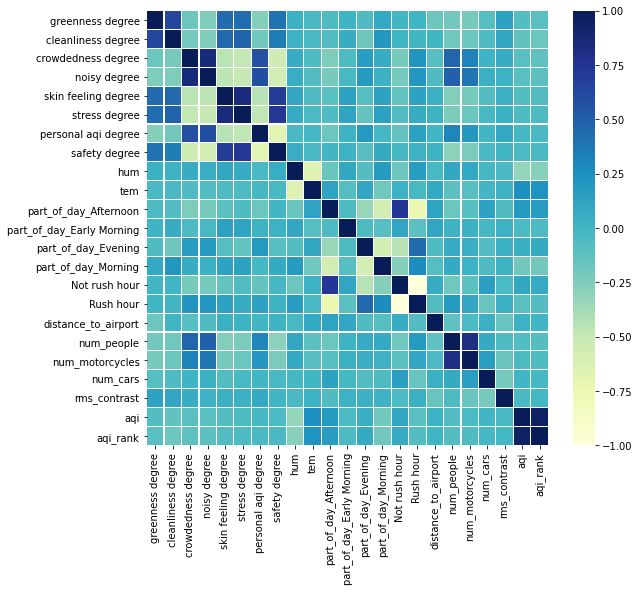

In [101]:
import seaborn as sns

f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corr_matrix, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 

In [102]:
MNR_air_merged_data_processed_combine_drop.head()

,greenness degree,cleanliness degree,crowdedness degree,noisy degree,skin feeling degree,stress degree,personal aqi degree,safety degree,hum,tem,part_of_day_Afternoon,part_of_day_Early Morning,part_of_day_Evening,part_of_day_Morning,Not rush hour,Rush hour,distance_to_airport,num_people,num_motorcycles,num_cars,rms_contrast,aqi,aqi_rank
0,2,5,2,3,2,3,3,4,53.0,36,0.0,0.0,0.0,1.0,0.0,1.0,8.111679,0,0,0,72.139110,18.181818,0
1,3,3,3,5,1,2,2,3,61.0,34,0.0,0.0,0.0,1.0,0.0,1.0,8.222342,9,9,1,72.570174,23.863636,0
2,2,4,3,2,2,2,4,2,65.0,32,0.0,0.0,0.0,1.0,0.0,1.0,8.274276,6,2,1,75.891906,19.318182,0
3,3,5,3,4,5,3,4,4,65.0,32,0.0,0.0,0.0,1.0,0.0,1.0,7.853721,3,4,0,73.111654,18.181818,0
4,3,4,4,2,3,3,3,2,61.0,34,0.0,0.0,0.0,1.0,0.0,1.0,7.877212,8,6,0,67.174571,26.136364,0


**1. AQI values**

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X = MNR_air_merged_data_processed_combine_drop.iloc[:,0:-2] 
y = MNR_air_merged_data_processed_combine_drop.iloc[:,-2].astype('int64')   
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(5,'Score'))

                     Features        Score
18            num_motorcycles  1600.803190
8                         hum  1560.438901
17                 num_people  1325.645051
11  part_of_day_Early Morning  1096.944157
12        part_of_day_Evening   600.803583


[0.04096305 0.04362678 0.03333308 0.03505591 0.03932431 0.0379031
 0.03811925 0.03489438 0.15448375 0.09402145 0.01033866 0.00198448
 0.00954188 0.01414558 0.0101564  0.0110076  0.15281768 0.06021537
 0.05270012 0.0384993  0.08686788]


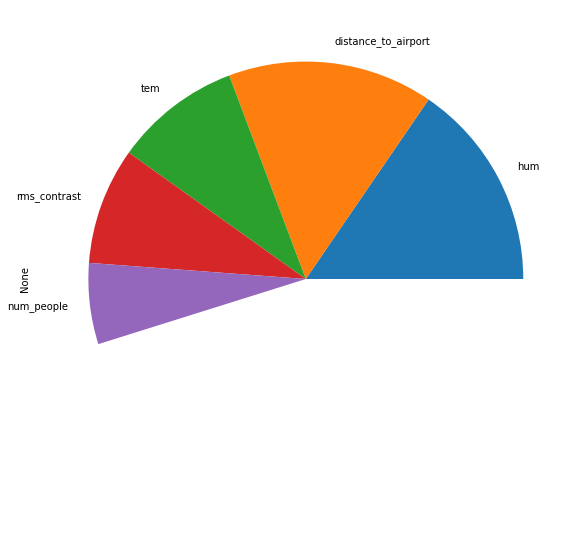

In [104]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(figsize=(10, 10),kind='pie')
plt.show()

**2. AQI ranks**

In [105]:
X = MNR_air_merged_data_processed_combine_drop.iloc[:,0:-2] 
y = MNR_air_merged_data_processed_combine_drop.iloc[:,-1]   
bestfeatures = SelectKBest(score_func=chi2, k=8)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']  
print(featureScores.nlargest(5,'Score'))

              Features       Score
18     num_motorcycles  362.789117
8                  hum  246.538942
17          num_people  232.852014
1   cleanliness degree   80.420387
19            num_cars   70.878582


[0.03156992 0.07386415 0.03021138 0.03215404 0.03971856 0.03560381
 0.03847087 0.02904042 0.15084515 0.10375398 0.01214799 0.00123839
 0.01712913 0.01991272 0.01224814 0.0125451  0.11505592 0.05305469
 0.07353664 0.03899522 0.07890379]


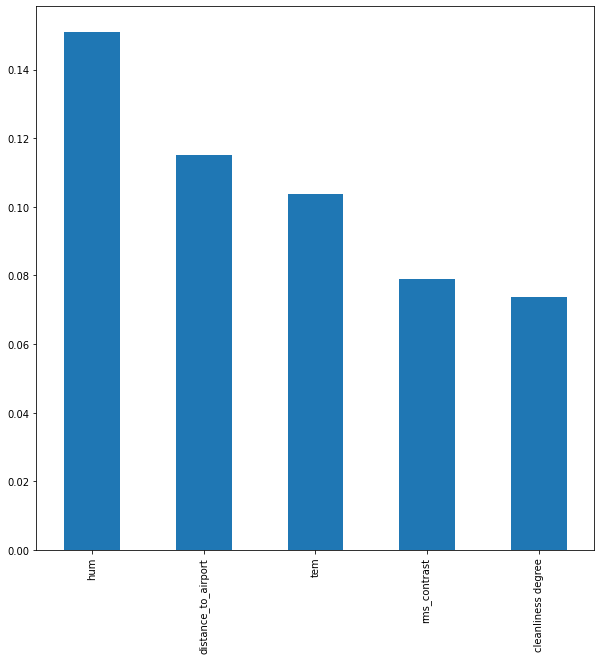

In [106]:
model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(figsize=(10, 10),kind='bar')
plt.show()